In [1]:
## Classification Tree on Unbalanced Dataset
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
%matplotlib inline

In [2]:
#Set the working directory
os.chdir("d:/K2Analytics/Datafile")

In [3]:
#Load the Dataset
CTDF_dev = pd.read_csv("DEV_SAMPLE.csv")
CTDF_holdout = pd.read_csv("HOLDOUT_SAMPLE.csv")

print( len(CTDF_dev),  len(CTDF_holdout))

14000 6000


In [4]:
CTDF_dev.head(10)

Cust_ID  Target  Age Gender    Balance Occupation  No_OF_CR_TXNS AGE_BKT  \
0  C16505       0   41      M   91519.92   SELF-EMP             38   41-45   
1  C17241       0   52      M  117288.96        SAL             17     >50   
2  C18802       0   31      F  259827.44       SENP              8   31-35   
3  C19289       0   45      F   26677.55       PROF             14   41-45   
4  C14028       0   39      F   43440.31       SENP              1   36-40   
5  C17960       0   45      M  403324.49       SENP             11   41-45   
6  C10216       1   33      M  245500.00        SAL             24   31-35   
7   C4575       0   26      F  464931.92   SELF-EMP             18   26-30   
8   C6171       0   38      M   49257.03        SAL             19   36-40   
9    C484       1   44      M   10791.71   SELF-EMP             17   41-45   

   SCR  Holding_Period  
0  926              15  
1  768              13  
2  816               5  
3  353              18  
4  751              31  
5  364               2  
6  166               9  
7  448              28  
8  237               5  
9  678               3

In [5]:
pd.value_counts(CTDF_dev['Target']) # Training Set

0    12765
1     1235
Name: Target, dtype: int64

In [17]:
1235 / 14000 # Response Rate = No. of Responder / Total Campaign Base

0.9117857142857143

In [7]:
#Data Preprocessing
#Splitting into features and response variables
X =  CTDF_dev[['Age', 'Gender', 'Balance', 'Occupation',
               'No_OF_CR_TXNS', 'AGE_BKT', 'SCR', 'Holding_Period']]


In [8]:
#Categorical Variable to Numerical Variables
X_train = pd.get_dummies(X)  ## one-hot encoding ; dummy 1-0 matrix
X_train.columns

Index(['Age', 'Balance', 'No_OF_CR_TXNS', 'SCR', 'Holding_Period', 'Gender_F',
       'Gender_M', 'Gender_O', 'Occupation_PROF', 'Occupation_SAL',
       'Occupation_SELF-EMP', 'Occupation_SENP', 'AGE_BKT_26-30',
       'AGE_BKT_31-35', 'AGE_BKT_36-40', 'AGE_BKT_41-45', 'AGE_BKT_46-50',
       'AGE_BKT_<25', 'AGE_BKT_>50'],
      dtype='object')

In [9]:
X_train.head()

Age    Balance  No_OF_CR_TXNS  SCR  Holding_Period  Gender_F  Gender_M  \
0   41   91519.92             38  926              15         0         1   
1   52  117288.96             17  768              13         0         1   
2   31  259827.44              8  816               5         1         0   
3   45   26677.55             14  353              18         1         0   
4   39   43440.31              1  751              31         1         0   

   Gender_O  Occupation_PROF  Occupation_SAL  Occupation_SELF-EMP  \
0         0                0               0                    1   
1         0                0               1                    0   
2         0                0               0                    0   
3         0                1               0                    0   
4         0                0               0                    0   

   Occupation_SENP  AGE_BKT_26-30  AGE_BKT_31-35  AGE_BKT_36-40  \
0                0              0              0              0   
1                0              0              0              0   
2                1              0              1              0   
3                0              0              0              0   
4                1              0              0              1   

   AGE_BKT_41-45  AGE_BKT_46-50  AGE_BKT_<25  AGE_BKT_>50  
0              1              0            0            0  
1              0              0            0            1  
2              0              0            0            0  
3              1              0            0            0  
4              0              0            0            0

In [10]:
y_train = CTDF_dev["Target"]

In [11]:
print (type(X_train) , type(y_train))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [12]:
#Decision Tree - Classification Tree & Regression Tree
# CART - Classification And Regression Tree
#Loading the library
from sklearn.tree import DecisionTreeClassifier

#Setting the parameter
clf = DecisionTreeClassifier(criterion = "gini" , 
                             min_samples_split = 30, # 6% of the population
                             min_samples_leaf = 10, # 2% of the population
                             max_depth = 50)


#Calling the fit function to built the tree
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=50, min_samples_leaf=10, min_samples_split=30)

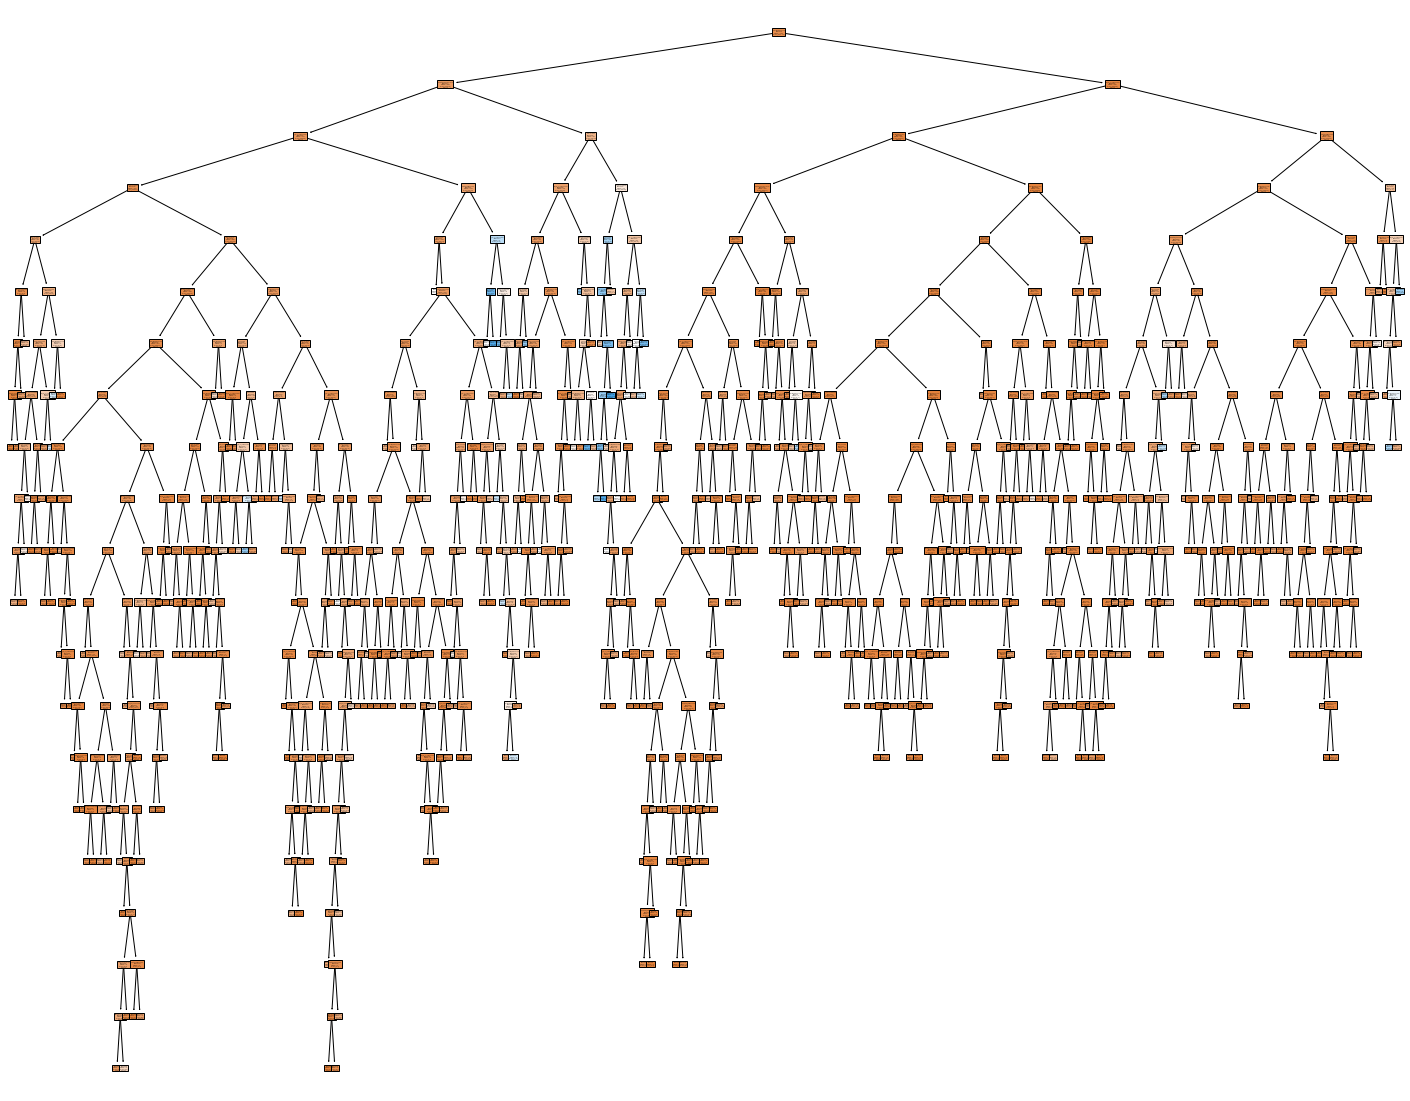

In [13]:
from sklearn import tree
from matplotlib import pyplot as plt
feature_list = list(X_train.columns.values)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_list,  
                   class_names=['0','1'],
                   filled=True)

In [ ]:
# plt.rcParams["figure.figsize"]=(400,200)
# plt.imshow(img)

In [14]:
## Let us see how good is the model
pred_y_train = clf.predict(X_train )
pred_y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
## Let us see the classification accuracy of our model
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
score = accuracy_score(y_train, pred_y_train)
score

0.923

In [18]:
12765 / 14000


0.9117857142857143

In [20]:
# What is the proportion of Responder - 0.0882 (8.82%)
# The labeled column has two classes , i.e. 1 for Responder and 0 for Non-Reponder
# One's are 8.82%
# Zero's are 91.18% - all are correctly predicted if i simply say all records belong to Zero Class

1- sum(y_train)/14000

0.9117857142857143

In [19]:
y_train_prob = clf.predict_proba(X_train)
## AUC
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob[:,1])
auc(fpr, tpr)

0.9249864650779982

In [20]:
## Let us see how good is the model
X_holdout =  CTDF_holdout[['Age', 'Gender', 'Balance', 'Occupation',
               'No_OF_CR_TXNS', 'AGE_BKT', 'SCR', 'Holding_Period']]
X_test = pd.get_dummies(X_holdout)
y_test = CTDF_holdout["Target"]


pred_y_test = clf.predict(X_test)
y_test_prob = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
auc(fpr, tpr)

0.6918601341023856

In [ ]:
clf

In [21]:
#Cross validation function
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train , y_train, 
                         cv = 10, scoring='roc_auc')
print("scores.mean() = ", scores.mean(), "; scores.std() = ", scores.std())


scores.mean() =  0.6954250058871896 ; scores.std() =  0.025139355114725384


In [22]:
scores

array([0.67190952, 0.68186043, 0.66289449, 0.72444309, 0.70361174,
       0.67825362, 0.66446936, 0.71227184, 0.73230357, 0.7222324 ])

In [23]:
y_test_prob = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
auc(fpr, tpr)

0.6918601341023856

In [29]:
np.arange(3,10)

array([3, 4, 5, 6, 7, 8, 9])

In [24]:
## Tuning the Classifier using GridSearchCV
from sklearn.model_selection import GridSearchCV
#help(GridSearchCV)

param_dist = {"criterion": ["gini","entropy"],
              "max_depth": np.arange(3,10),
              "min_samples_split" :  [ 50, 100, 150]
              }
# Criterion has 2 levels
# 3 to 10 --- it has 7 levels

tree = DecisionTreeClassifier(
                             min_samples_leaf = 10)

tree_cv  = GridSearchCV(tree, param_dist, cv = 10, 
                        scoring = 'roc_auc', verbose = 10, n_jobs=-1)

tree_cv.fit(X_train,y_train)



Fitting 10 folds for each of 42 candidates, totalling 420 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(min_samples_leaf=10),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': [50, 100, 150]},
             scoring='roc_auc', verbose=10)

In [25]:
## Building the model using best combination of parameters
print("Tuned Decision Tree parameter : {}".format(tree_cv.best_params_))

Tuned Decision Tree parameter : {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 150}


In [26]:
classifier = tree_cv.best_estimator_
classifier.fit(X_train,y_train)

scores = cross_val_score(classifier, X_train , y_train, 
                         cv = 10, scoring='roc_auc')
print("scores.mean() = ", scores.mean(), "; scores.std() = ", scores.std())


scores.mean() =  0.7677262999911126 ; scores.std() =  0.01882702630349177


In [27]:
y_test_prob = classifier.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
auc_h = auc(fpr, tpr)
auc_h

0.7546361381549463

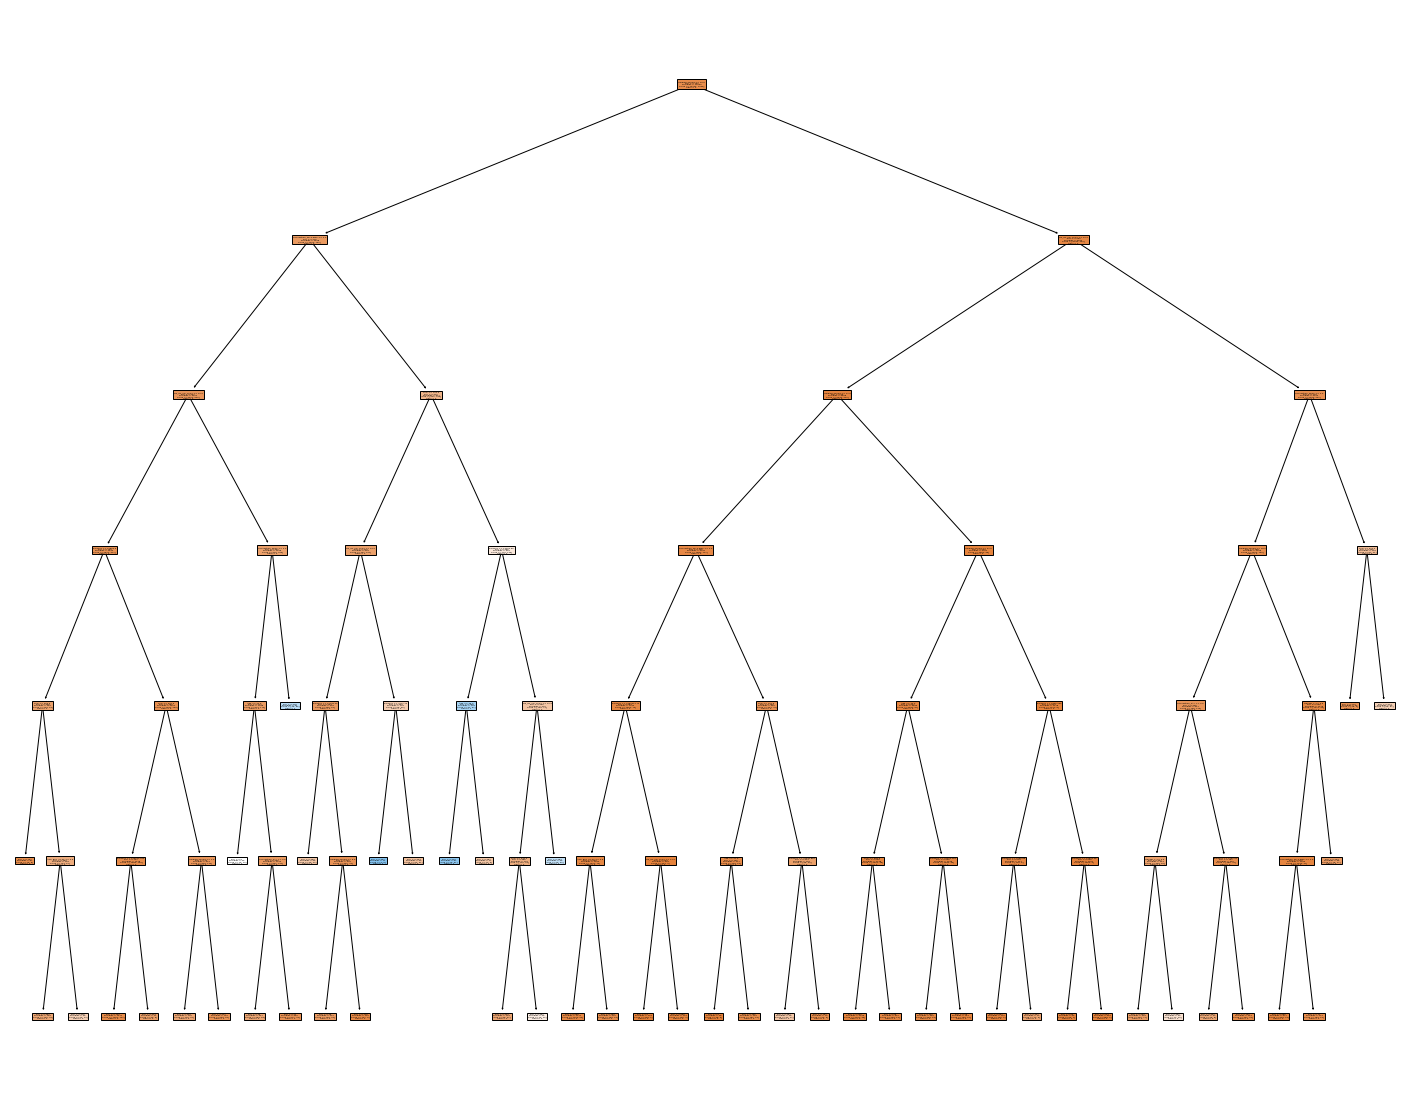

In [35]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, 
                   feature_names=feature_list,  
                   class_names=['0','1'],
                   filled=True)

Thank you 